In questo colab plottiamo i dati relativi ai tempi di esecuzione di vari modelli testati con ScaleSim

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [41]:
df1 = pd.read_csv('exec_time_SS1.csv').sort_values(by='numero di livelli')
df2 = pd.read_csv('exec_time_SS2.csv').sort_values(by='numero di livelli')

In [40]:
df2.head()

,nome,numero di livelli,tempo di esecuzione,Grandezza massima file generato,Grandezza medie files generati,Numero di file generati,Peso totale artefatti
0,deep_voice,6,0.040885,246,129,6,4751184
5,gpt2,9,122.056922,1159960,188881,6,10444334194
3,google_translate_dec,11,0.073437,246,129,6,8710504
4,google_translate_enc,12,0.079426,246,129,6,9502368
1,FasterRCNN,49,15.054898,162813,6638,6,1998187645


In [42]:
exec_time_log_1 = (df1["tempo di esecuzione"])
exec_time_log_2 = (df2["tempo di esecuzione"])

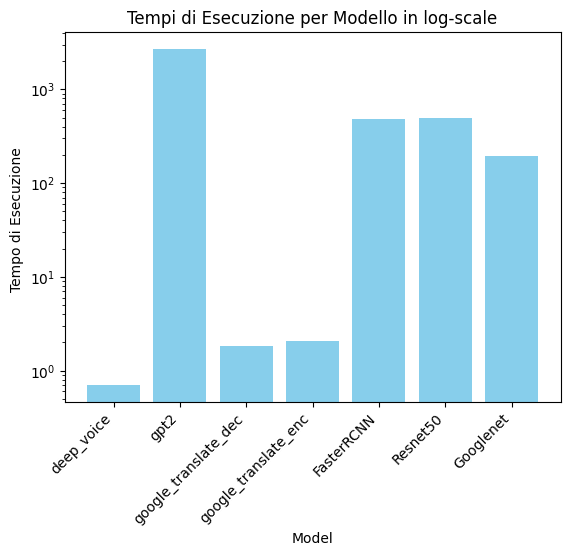

In [43]:
plt.bar(df1['nome'], exec_time_log_1, color='skyblue')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.title("Tempi di Esecuzione per Modello in log-scale")
plt.xlabel("Model")
plt.ylabel("Tempo di Esecuzione ")

plt.show()

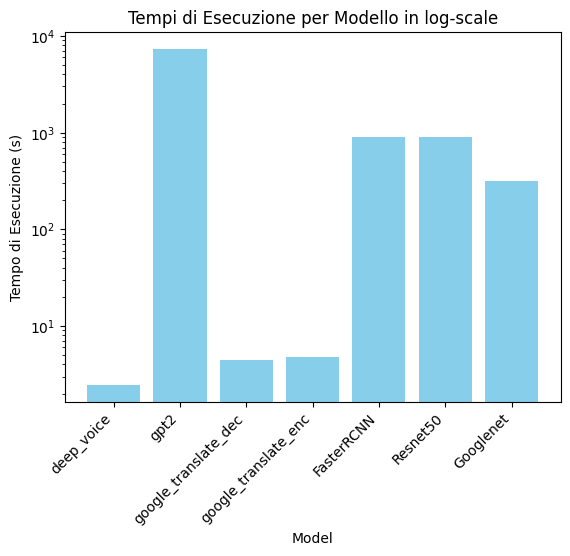

In [44]:
plt.bar(df2['nome'], exec_time_log_2, color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.title("Tempi di Esecuzione per Modello in log-scale")
plt.xlabel("Model")
plt.ylabel("Tempo di Esecuzione (s)")

plt.show()

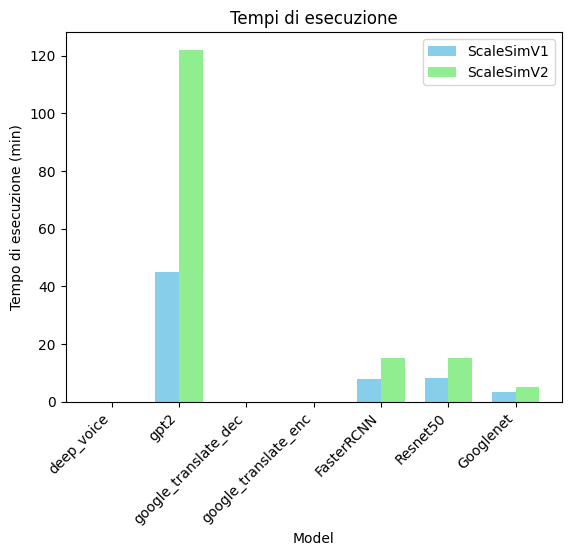

In [45]:
exec_time_log_1 /= 60
exec_time_log_2 /= 60

n = len(df2['nome'])
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(ind - width/2, exec_time_log_1, width, label='ScaleSimV1', color='skyblue')

# Barre del secondo dataset
bar2 = ax.bar(ind + width/2, exec_time_log_2, width, label='ScaleSimV2', color='lightgreen')

ax.set_xticks(ind)
ax.set_xticklabels(df2['nome'], rotation=45, ha='right')
plt.title("Tempi di esecuzione")
plt.xlabel("Model")
plt.ylabel("Tempo di esecuzione (min)")

plt.legend()

plt.show()

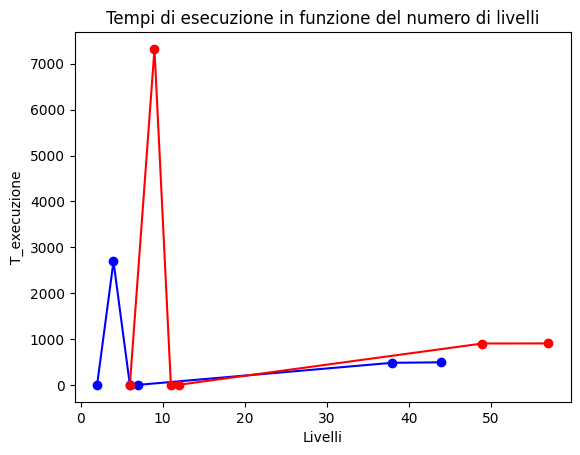

In [ ]:
plt.plot(df1['numero di livelli'][:-1], df1['tempo di esecuzione'][:-1], marker='o', linestyle='-', color='blue')
plt.plot(df2['numero di livelli'][:-1], df2['tempo di esecuzione'][:-1], marker='o', linestyle='-', color='red')

plt.title("Tempi di esecuzione in funzione del numero di livelli")
plt.xlabel("Livelli")
plt.ylabel("T_execuzione")

# Mostra il grafico
plt.show()

In [ ]:
#np.log10()
max_f_weight_1 = df1["Grandezza massima file generato"]
max_f_weight_2 = df2["Grandezza massima file generato"]
avg_f_weight_1 = df1["Grandezza medie files generati"]
avg_f_weight_2 = (df2["Peso totale artefatti"] / 1024)/(df2["Numero di file generati"]*df2["numero di livelli"])
print(avg_f_weight_2 )

0       128.884115
5    188880.465025
3       128.884115
4       128.884115
1      6637.262320
6      6111.969490
2      1982.635382
dtype: float64


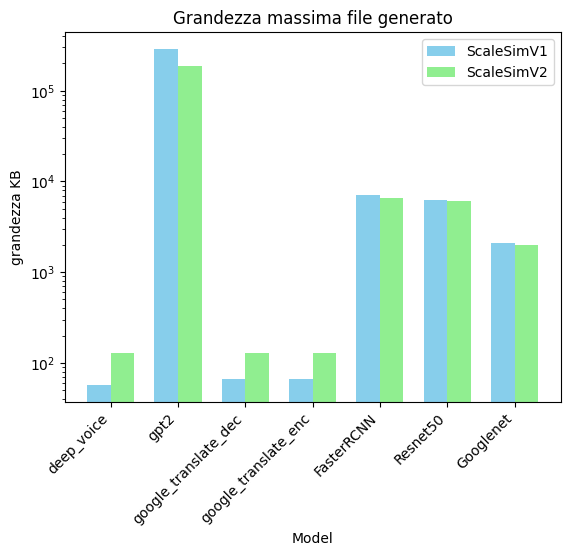

In [ ]:
n = len(df2['nome'])
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(ind - width/2, avg_f_weight_1, width, label='ScaleSimV1', color='skyblue')

# Barre del secondo dataset
bar2 = ax.bar(ind + width/2, avg_f_weight_2, width, label='ScaleSimV2', color='lightgreen')

ax.set_xticks(ind)
ax.set_yscale('log')
ax.set_xticklabels(df2['nome'], rotation=45, ha='right')
plt.title("Grandezza massima file generato")
plt.xlabel("Model")
plt.ylabel("grandezza KB")

plt.legend()

plt.show()

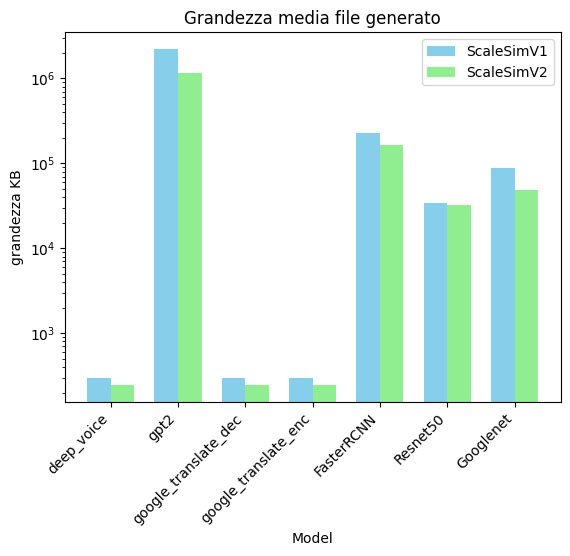

In [ ]:
n = len(df2['nome'])
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(ind - width/2, max_f_weight_1, width, label='ScaleSimV1', color='skyblue')

# Barre del secondo dataset
bar2 = ax.bar(ind + width/2, max_f_weight_2, width, label='ScaleSimV2', color='lightgreen')

ax.set_xticks(ind)
ax.set_yscale('log')
ax.set_xticklabels(df2['nome'], rotation=45, ha='right')
plt.title("Grandezza media file generato")
plt.xlabel("Model")
plt.ylabel("grandezza KB")

plt.legend()

plt.show()

Plotto l'andamento solo della grandezza media al variare dei livelli

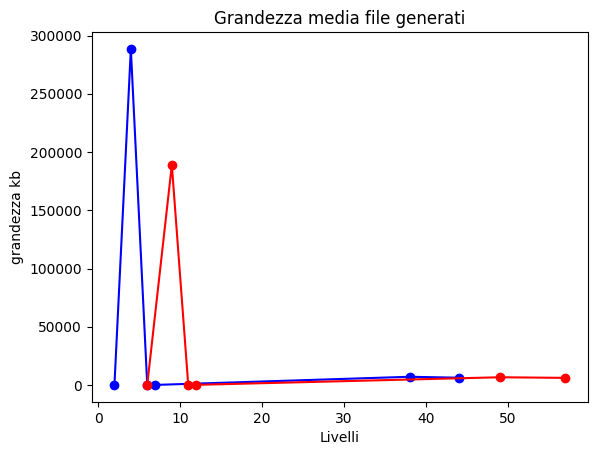

In [ ]:
plt.plot(df1['numero di livelli'][:-1], avg_f_weight_1[:-1], marker='o', linestyle='-', color='blue')
plt.plot(df2['numero di livelli'][:-1], avg_f_weight_2[:-1], marker='o', linestyle='-', color='red')

plt.title("Grandezza media file generati")
plt.xlabel("Livelli")
plt.ylabel("grandezza kb")

# Mostra il grafico
plt.show()

Faccio una analisi sul peso totale degli artefatti

In [ ]:
n_artifacts_1 = df1["Numero di file generati"]
n_artifacts_2 = df2["Numero di file generati"] * df2["numero di livelli"]
sum_artifacts_1 = df1["Peso totale artefatti"]
sum_artifacts_2 = df2["Peso totale artefatti"]

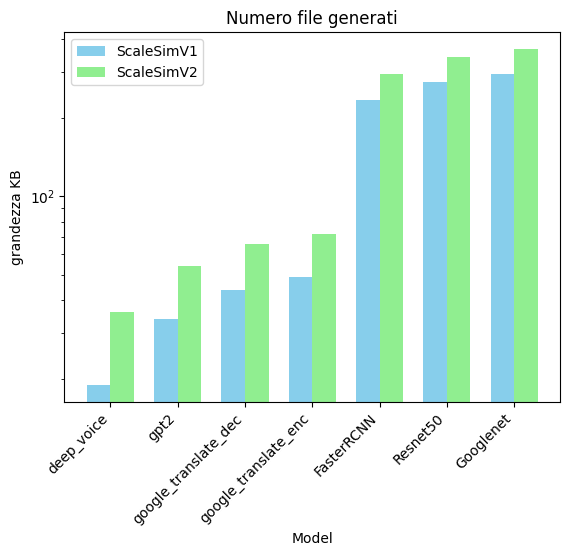

In [ ]:
n = len(df2['nome'])
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(ind - width/2, n_artifacts_1, width, label='ScaleSimV1', color='skyblue')

# Barre del secondo dataset
bar2 = ax.bar(ind + width/2, n_artifacts_2, width, label='ScaleSimV2', color='lightgreen')

ax.set_xticks(ind)
ax.set_yscale('log')
ax.set_xticklabels(df2['nome'], rotation=45, ha='right')
plt.title("Numero file generati")
plt.xlabel("Model")
plt.ylabel("grandezza KB")

plt.legend()

plt.show()

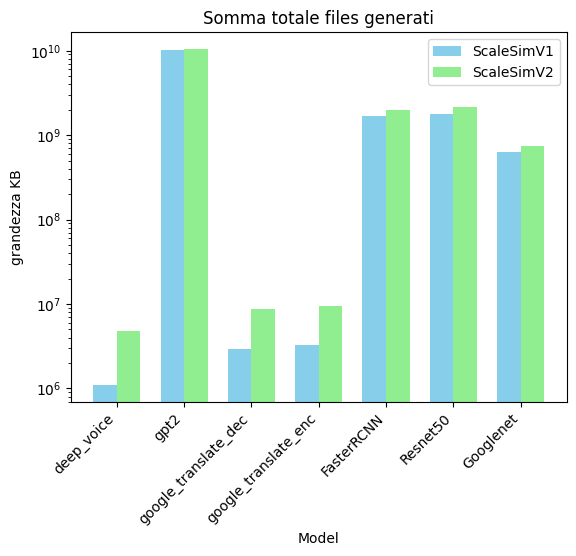

In [ ]:
n = len(df2['nome'])
ind = np.arange(n)
width = 0.35
fig, ax = plt.subplots()

bar1 = ax.bar(ind - width/2, sum_artifacts_1, width, label='ScaleSimV1', color='skyblue')

# Barre del secondo dataset
bar2 = ax.bar(ind + width/2, sum_artifacts_2, width, label='ScaleSimV2', color='lightgreen')

ax.set_xticks(ind)
ax.set_yscale('log')
ax.set_xticklabels(df2['nome'], rotation=45, ha='right')
plt.title("Somma totale files generati")
plt.xlabel("Model")
plt.ylabel("grandezza KB")

plt.legend()

plt.show()